In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

def wiener_filter(data, template, p=False):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    w_filter = np.abs(np.fft.fft(np.convolve(data_fft, template_fft, mode='same')))
    
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter2(data, template, p=False):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    w_filter = np.abs(np.convolve(data_fft, template_fft, mode='same'))
    
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter3(data, template, p=False):
    data_fft = np.fft.fft(data)
    template_fft = np.fft.fft(template)
    w_filter = np.abs(np.fft.fft(data_fft * template_fft))
    
    if p:
        print("data_fft length: " + str(len(data_fft)))
        print("data_fft: " + str(data_fft) + "\n")
        print("template_fft length: " + str(len(template_fft)))
        print("template_fft: " + str(template_fft) + "\n")
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter4(data, template, p=False):
    w_filter = np.abs(np.convolve(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter5(data, template, p=False):
    w_filter = np.abs(scipy.signal.fftconvolve(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def wiener_filter6(data, template, p=False):
    w_filter = np.abs(scipy.signal.correlate(data, template, mode='same'))
    
    if p:
        print("w_filter length: " + str(len(w_filter)))
        print("w_filter: " + str(w_filter))
    return w_filter

def timeseries_plot(data):
    timesteps = np.arange(len(data))
    plt.plot(timesteps, data)
    plt.show()

white noise plot: 


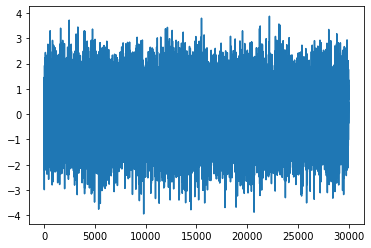

signal plot: 


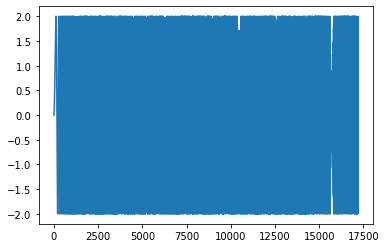

white noise + injected signal plot: 


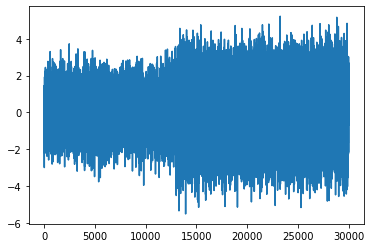

matplotlib.spectrogram plot (white noise + signal): 


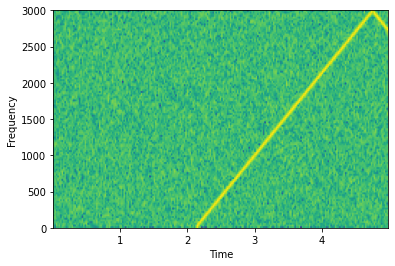

scipy.spectrogram plot (white noise + signal): 


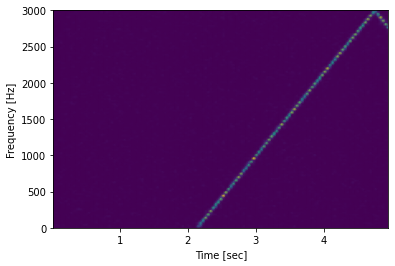

In [102]:
# Generate white noise
noise_length = 30000
rng = np.random.default_rng()
white_noise = rng.standard_normal(noise_length)
print("white noise plot: ")
timeseries_plot(white_noise)

# Generate a signal
start_time = 12800
sig_length = noise_length - start_time
sig_timesteps = np.arange(sig_length)
alpha = 0.0001
amplitude = 2
signal = amplitude * np.sin(alpha * np.square(sig_timesteps))
print("signal plot: ")
timeseries_plot(signal)

# Inject the signal
left_noise = white_noise[:start_time]
left_zeros = np.zeros(len(left_noise))
extended_sig = np.concatenate((left_zeros, signal), axis=None)
sig_noise = white_noise + extended_sig
#   right_noise = white_noise[start_time + sig_length:]
#   sig_noise = np.concatenate((left_noise, signal, right_noise), axis=None)
#   sig_noise = np.concatenate((left_noise, signal), axis=None)
print("white noise + injected signal plot: ")
timeseries_plot(sig_noise)

# Spectrogram the signal
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(sig_noise, Fs=6000)
plt.xlabel('Time')
plt.ylabel('Frequency')
print("matplotlib.spectrogram plot (white noise + signal): ")
plt.show()   
fs = 6000
f, t, Sxx = scipy.signal.spectrogram(sig_noise, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print("scipy.spectrogram plot (white noise + signal): ")
plt.show()

template plot (alpha1): 


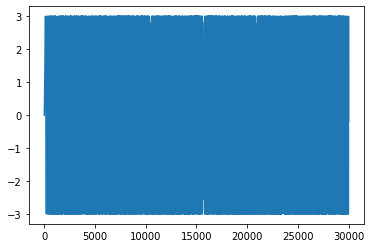

filter plot (template alpha = 0.00010):


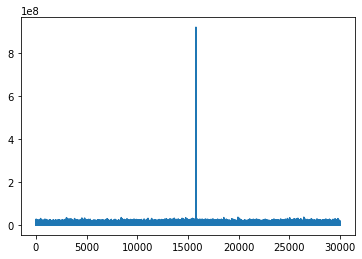

filter plot (template alpha = 0.00011):


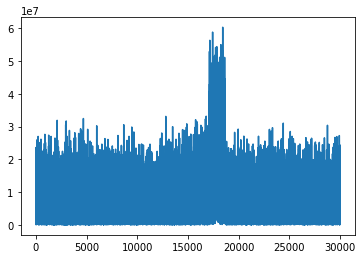

filter plot (template alpha = 0.00014):


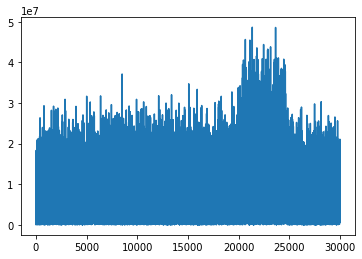

In [103]:
# Generate a signal template
template_length = noise_length
template_timesteps = np.arange(template_length)
alpha1 = 0.00010
alpha2 = 0.00011
alpha3 = 0.00014
amplitude = 2
template1 = amplitude * np.sin(alpha1 * np.square(template_timesteps))
template2 = amplitude * np.sin(alpha2 * np.square(template_timesteps))
template3 = amplitude * np.sin(alpha3 * np.square(template_timesteps))
print("template plot (alpha1): ")
timeseries_plot(template)

filtered1 = wiener_filter3(sig_noise, template1)
print("filter plot (template alpha = 0.00010):")
timeseries_plot(filtered1)
filtered1 = wiener_filter3(sig_noise, template2)
print("filter plot (template alpha = 0.00011):")
timeseries_plot(filtered1)
filtered1 = wiener_filter3(sig_noise, template3)
print("filter plot (template alpha = 0.00014):")
timeseries_plot(filtered1)